In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths


In [17]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = '/Users/isabella/multi-memory-task/logs' 

# Replace this with the name of the dataset directories
datasets = ['2023_06_12_16_21_06', '2023_06_14_15_10_21', '2023_06_14_15_29_45','2023_06_14_16_26_14',"2023_06_14_16_46_43"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)


Number of trials:  623


Text(0, 0.5, 'Number of trials')

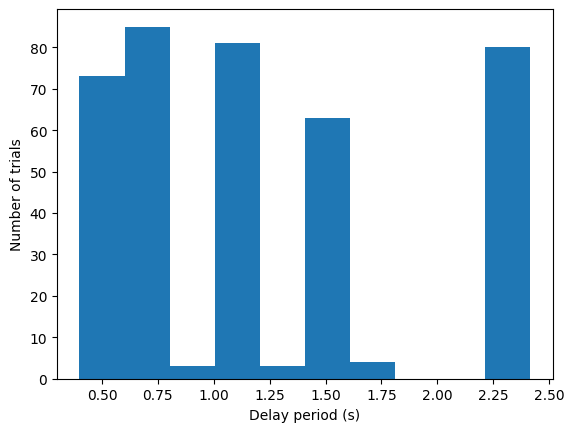

In [5]:
plt.hist(df["delay_s"])
plt.xlabel('Delay period (s)')
plt.ylabel('Number of trials')
# df.rounded_delay_s.unique()
#histogram of delay distribution

In [18]:
df['rounded_delay_s'] = np.round(df.delay_s, 1)


<Axes: xlabel='Delay Time (s)', ylabel='Frequency'>

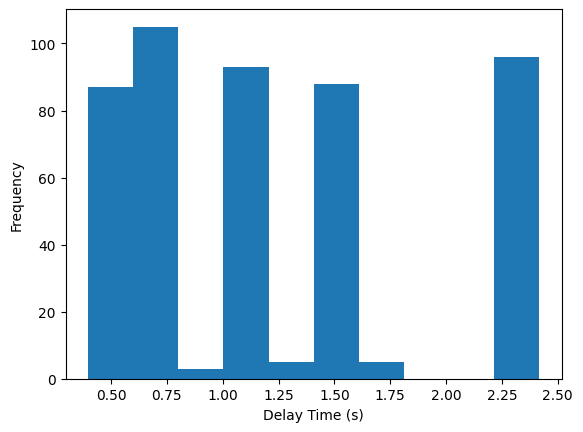

In [19]:

# df.groupby([df, 'delay_s']).count()

# df.groupby('delay_s')['correct'].plot(kind='hist')
df['delay_s'].plot(kind= 'hist', xlabel='Delay Time (s)')


<Axes: title={'center': 'vSTM Task Delay Time Effect on Accuracy'}, xlabel='Delay Period (s)', ylabel='Accuracy'>

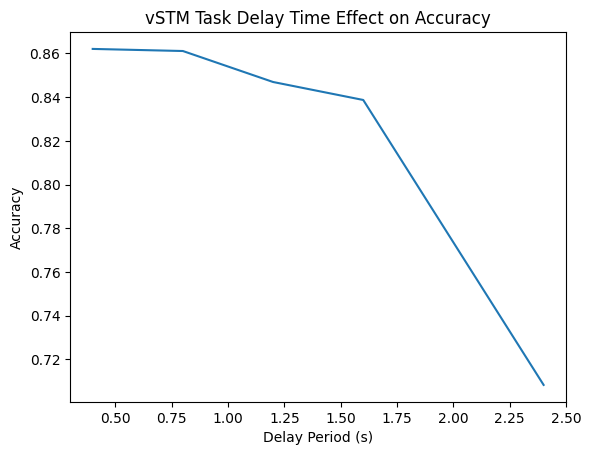

In [20]:
correct = np.where(df['correct'] == 'True')
df.groupby('rounded_delay_s').correct.mean().plot(xlabel='Delay Period (s)', ylabel='Accuracy', title='vSTM Task Delay Time Effect on Accuracy')


<Axes: title={'center': 'vSTM Task Encoding Time Effect on Accuracy'}, xlabel='Encoding Time (s)', ylabel='Accuracy'>

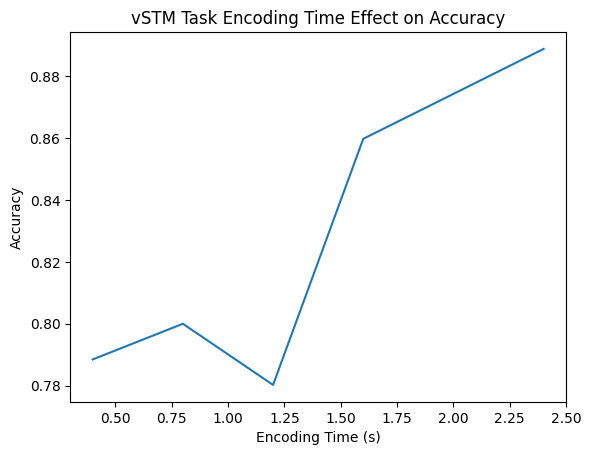

In [22]:
df['rounded_visible_s'] = np.round(df.visible_s, 1)
df.groupby('rounded_visible_s').correct.mean().plot(xlabel= 'Encoding Time (s)', ylabel='Accuracy', title='vSTM Task Encoding Time Effect on Accuracy')



<Axes: xlabel='rounded_delay_s', ylabel='mean_accuracy'>

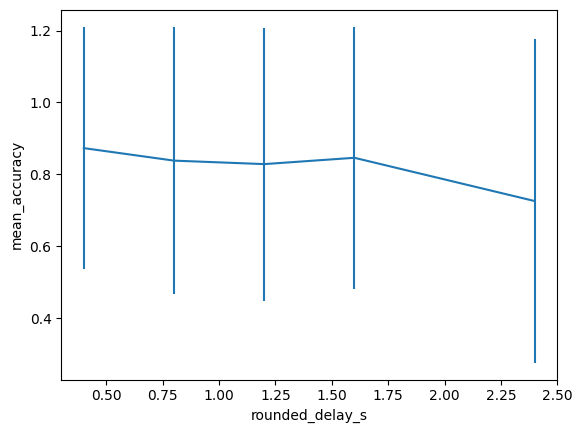

In [22]:
delay_std = df.groupby('rounded_delay_s').correct.std()
df.groupby('rounded_delay_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

<Axes: xlabel='rounded_visible_s', ylabel='mean_accuracy'>

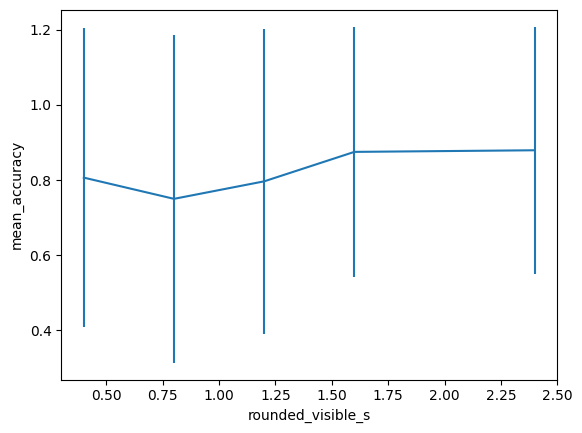

In [21]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df.groupby('rounded_visible_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

-0.14189705460416313
0.14189705460416313


<Axes: xlabel='Angular Distance (rad)', ylabel='Frequency'>

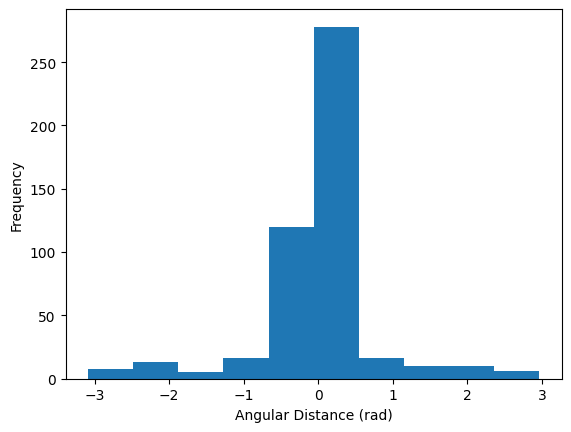

In [23]:
# plotting the distribution of distance from the response to the correct response
def _conv_angle(theta):
    if theta < 0:
        return 2 * np.pi + theta
    return theta

def find_angular_dist(theta1, theta2):
    conv_theta1 = _conv_angle(theta1)
    conv_theta2 = _conv_angle(theta2)
    # difference = conv_theta1 - conv_theta2
    # sign = np.sign(difference)
    # raw_distance = difference % np.pi
    # angular_distance = raw_distance * sign
    TAU = 2 * np.pi
    a = (theta1 - theta2) % TAU
    b = (theta2 - theta1) % TAU
    return -a if a < b else b

print(find_angular_dist(-2.9996955989856295,3.141592653589793))
print(find_angular_dist(3.141592653589793,-2.9996955989856295))

df.response_object_ind.astype(int)
precision_difference_arr = []

for (row_index,row_data) in df.iterrows():
    precision_difference_arr.append(find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))
    # precision_difference_arr.append(row_data['object_0_theta'] - row_data['response_theta'])

df['precision_difference_0'] = precision_difference_arr
df['precision_difference_0'].plot(kind= 'hist', xlabel='Angular Distance (rad)')


<Axes: ylabel='Frequency'>

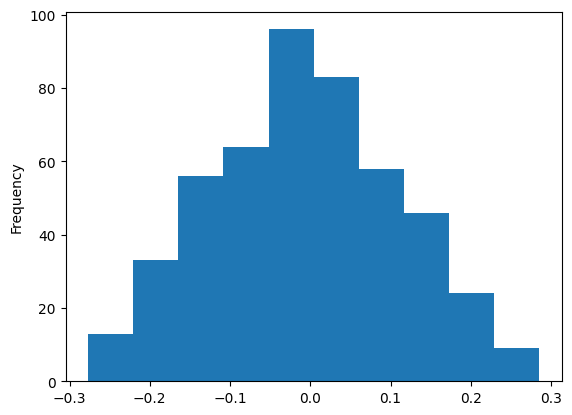

In [24]:
#plotting the distribution of distance from the response to the actual target (regardless of correctness)
i = 0
response_precision_arr = []
s = 'object_' + str(i) + '_theta'
df.response_object_ind.astype(int)
r = 1

for (row_index,row_data) in df.iterrows():
    s = 'object_' + str(int(row_data['response_object_ind'])) + '_theta'
    response_precision_arr.append(find_angular_dist(row_data[s],row_data['response_theta']))
    # response_precision_arr.append(row_data[s] - row_data['response_theta'])



df['precision_difference'] = response_precision_arr
df['precision_difference'].plot(kind= 'hist')


Text(0.5, 0, '')

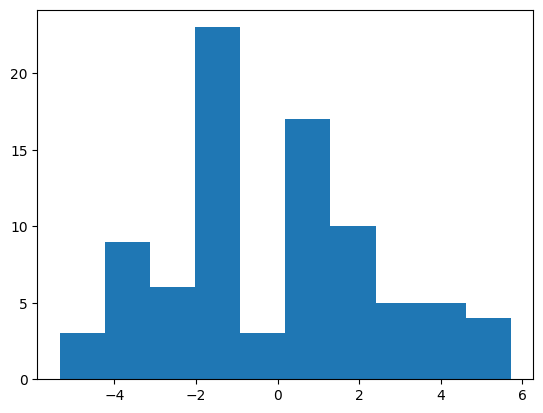

In [25]:
#plotting distribution of how incorrect you are. 
#isolated by incorrect trials and distance from the target is calculated
i = 0
s = 'object_' + str(i) + '_theta'
response_precision_arr = []

for (row_index,row_data) in df.iterrows():
    if (row_data['correct'] == False):
        i = row_data['response_object_ind']
        response_precision_arr.append(row_data[s] - row_data['response_theta'])

plt.hist(response_precision_arr)
plt.xlabel('')

In [ ]:
df

,trial_num,time,object_0_x,object_0_y,object_0_id,object_0_theta,object_1_x,object_1_y,object_1_id,object_1_theta,...,response_id,response_theta,correct,response_y,visible_s,delay_s,rounded_visible_s,rounded_delay_s,precision_difference,precision_difference_0
0,1,1.686601e+09,0.218135,0.707491,a,-0.936228,0.160940,0.413176,c,-1.821483,...,a,-0.875039,True,0.680703,0.799808,0.812311,0.8,0.8,-0.001068,-0.000374
3,4,1.686601e+09,0.537909,0.847941,b,0.108525,0.286410,0.222729,f,-2.485206,...,b,0.050921,True,0.784535,1.200918,1.200648,1.2,1.2,0.001005,0.000352
4,5,1.686601e+09,0.172791,0.624234,d,-1.207932,0.677491,0.801657,h,0.531837,...,d,-1.187918,True,0.659963,2.400211,1.600977,2.4,1.6,-0.000349,-0.000122
6,7,1.686601e+09,0.513272,0.849748,h,0.037928,0.849716,0.485912,b,1.611060,...,h,-0.022361,True,0.819675,0.799023,0.399859,0.8,0.4,0.001052,0.000368
8,9,1.686601e+09,0.450077,0.846421,d,-0.143126,0.161907,0.590517,f,-1.309203,...,d,0.020260,True,0.812267,0.398743,1.601225,0.4,1.6,-0.002852,-0.000998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,210,1.686603e+09,0.525069,0.849101,a,0.071686,0.527967,0.151119,d,3.061603,...,a,0.029322,True,0.909291,0.800830,0.399294,0.8,0.4,0.000739,0.000259
208,211,1.686603e+09,0.203861,0.313447,d,-2.132948,0.168820,0.613224,h,-1.241374,...,d,-1.926556,True,0.386340,1.600446,0.400395,1.6,0.4,-0.003602,-0.001261
209,212,1.686603e+09,0.695186,0.209479,b,2.550011,0.153833,0.551657,a,-1.422665,...,d,0.166949,False,0.837094,1.199853,1.600677,1.2,1.6,0.000356,0.014557
210,213,1.686603e+09,0.298726,0.786337,d,-0.612688,0.372080,0.174214,f,-2.767438,...,d,-0.408804,True,0.815126,1.600132,0.400060,1.6,0.4,-0.003558,-0.001245


<Axes: title={'center': 'vSTM Task Delay Time Effect on Error'}, xlabel='Delay Time (s)', ylabel='Error (rad)'>

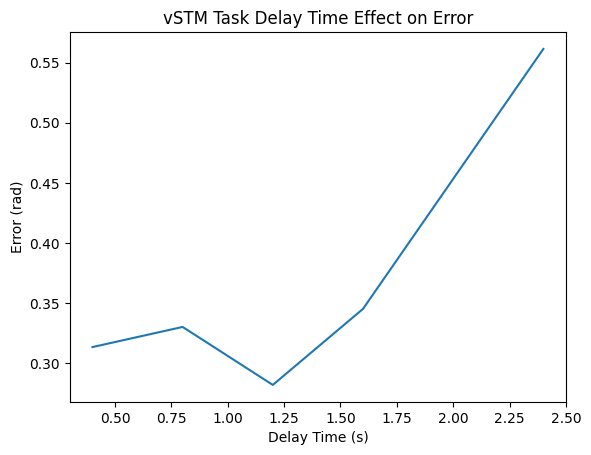

In [27]:
delay_std = df.groupby('rounded_delay_s').correct.std()
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel='Error (rad)', title='vSTM Task Delay Time Effect on Error')

<Axes: title={'center': 'vSTM Task Encoding Time Effect on Error'}, xlabel='Encoding Time (s)', ylabel='Error (rad)'>

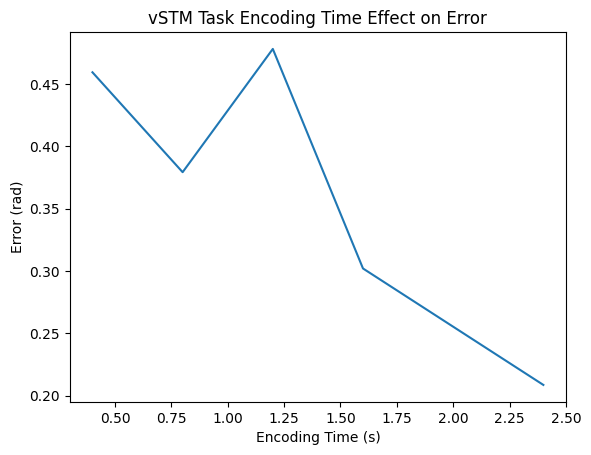

In [28]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_visible_s').precision_difference_0_abs.mean().plot(xlabel= 'Encoding Time (s)', ylabel='Error (rad)', title='vSTM Task Encoding Time Effect on Error')

In [25]:
df['num_object']

0      5
3      5
4      5
6      4
8      5
      ..
403    4
405    3
406    5
407    5
408    5
Name: num_object, Length: 315, dtype: int64

<Axes: title={'center': 'vSTM Task Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

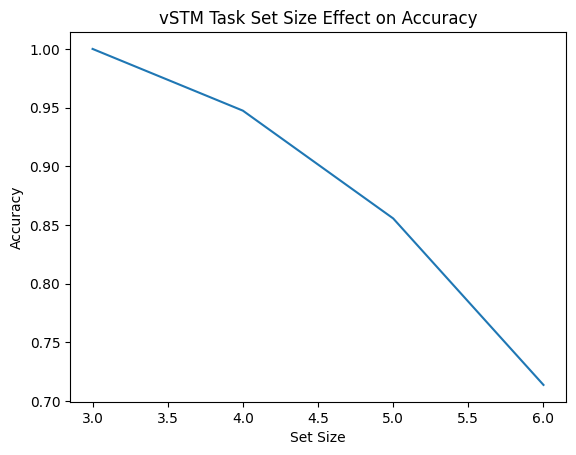

In [29]:
df.groupby('num_object').correct.mean().plot(xlabel= 'Set Size', ylabel='Accuracy', title='vSTM Task Set Size Effect on Accuracy')

<Axes: title={'center': 'vSTM Task Set Size Effect on Error'}, xlabel='Set Size', ylabel='Error (rad)'>

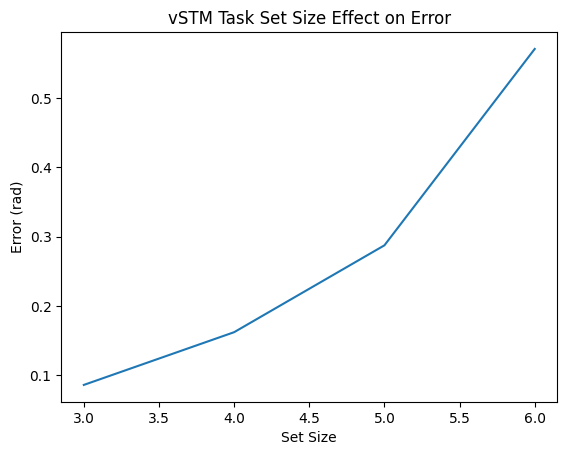

In [30]:
df.groupby('num_object').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel='Error (rad)', title='vSTM Task Set Size Effect on Error')